## QUESTION 1
####  import and load the toy datasets from sklearn

In [1]:
import numpy as np
import pandas as pd

In [52]:
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_digits
from sklearn.datasets import load_linnerud
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer 

In [53]:
boston = load_boston()              # regression
iris = load_iris()                  # classification 
diabetes = load_diabetes()          # regression
digits = load_digits()              # classification 
linnerud = load_linnerud()          # regression
wine = load_wine()                  # classification
cancer = load_breast_cancer()       # classification


###  1(A) 
### import and initialize the following classifers from sklearn: 

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


In [54]:
gnb = GaussianNB() # probabilistic
tree = DecisionTreeClassifier(random_state=42) # divide and conquer
neigh = KNeighborsClassifier() # instance based
mlp = MLPClassifier( random_state=42,max_iter=1000) # neural network


## Train and run each classifier on each classification dataset separately

In [56]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [57]:
# Understand difference between these two:
## cross_val_score is a wrapper and uses KFold or StratifiedKFold
## strategies by default, the latter being used if the estimator derives from ClassifierMixin

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

#### The cross_validate function differs from cross_val_score in two ways -It allows specifying multiple metrics for evaluation.It returns a dict containing training scores, fit-times and score-timesin addition to the test score.

In [58]:
from sklearn.model_selection import cross_validate
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [104]:
import sklearn.datasets
ds = sklearn.datasets.load_iris()
# Data Preparation
iris = load_iris()
digits = load_digits()              # classification 
wine = load_wine()                  # classification
cancer = load_breast_cancer()       # classification

type(iris)
#print(iris.data)

sklearn.utils.Bunch

In [105]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.datasets import make_s_curve
from sklearn.datasets import make_swiss_roll
from sklearn.datasets import make_biclusters
from sklearn.datasets import make_checkerboard
from sklearn.datasets import make_regression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [106]:
X = digits.data
y = digits.target
X = wine.data
y = wine.target
X = cancer.data
y = cancer.target
X = iris.data
y = iris.target

In [107]:
## split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=30)

X_train.shape
X_test.shape

y_train.shape
y_test.shape

(45,)

### Iris classification

In [109]:
# KNN 

knn = KNeighborsClassifier(n_neighbors=5)

## fit the model with data
knn.fit(X_train, y_train)

## predict the response for new observations
y_pred = knn.predict(X_test)



In [111]:

## measure performance
### Accuracy
print(metrics.accuracy_score(y_test,y_pred))

### KFold Cross Validation
scores = cross_val_score(knn, iris.data, iris.target, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

### we can also obtain predictions with:
predicted = cross_val_predict(knn, iris.data, iris.target, cv=10)
print("Accuracy: %0.2f" %metrics.accuracy_score(iris.target,predicted))

0.9333333333333333
Accuracy: 0.97 (+/- 0.09)
Accuracy: 0.97


Text(0, 0.5, 'Testing Accuracy')

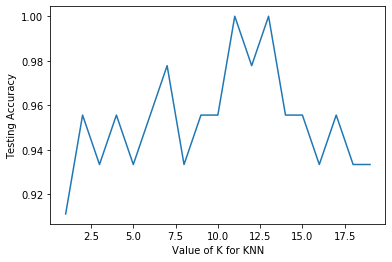

In [112]:
## evaluate with different K, using train/test split
scores = []
k_range = range(1,20)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))


import matplotlib.pyplot as plt
plt.plot(k_range, scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")

In [114]:
## evaluate with different K, using KFold split
scores = []
k_range = range(1,20)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    scores.append(cv_scores.mean())

In [116]:
scores

[0.96,
 0.9533333333333334,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9733333333333334,
 0.9666666666666668,
 0.9666666666666668,
 0.9733333333333334,
 0.9800000000000001,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9800000000000001,
 0.9733333333333334]

Text(0, 0.5, 'Testing Accuracy')

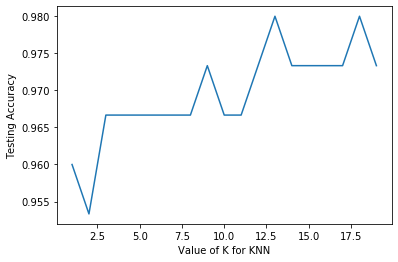

In [115]:
import matplotlib.pyplot as plt
plt.plot(k_range, scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")

### iris classification report

In [87]:
print(classification_report(iris.target,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.92      0.95        50
           2       0.92      0.98      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



### Wine data classification

In [117]:
gnb = GaussianNB() # probabilistic

## fit the model with data
gnb.fit(X_train, y_train)

## predict the response for new observations
y_pred = gnb.predict(X_test)

In [118]:
## measure performance
### Accuracy
print(metrics.accuracy_score(y_test,y_pred))

### KFold Cross Validation
scores = cross_val_score(gnb, wine.data, wine.target, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

### we can also obtain predictions with:
predicted1 = cross_val_predict(gnb, wine.data, wine.target, cv=10)
print("Accuracy: %0.2f" %metrics.accuracy_score(wine.target,predicted1))

0.9555555555555556
Accuracy: 0.96 (+/- 0.08)
Accuracy: 0.96


### wine classification

In [119]:
print(classification_report(wine.target,predicted1))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        59
           1       0.97      0.93      0.95        71
           2       0.94      1.00      0.97        48

    accuracy                           0.96       178
   macro avg       0.96      0.97      0.96       178
weighted avg       0.96      0.96      0.96       178



### Cancer Classifcation

In [123]:
mlp = MLPClassifier() # neural network
## fit the model with data
mlp.fit(X_train, y_train)

## predict the response for new observations
y_pred = mlp.predict(X_test)

C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [124]:
## measure performance
### Accuracy
print(metrics.accuracy_score(y_test,y_pred))

### KFold Cross Validation
scores = cross_val_score(mlp, cancer.data, cancer.target, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

### we can also obtain predictions with:
predicted2 = cross_val_predict(mlp, cancer.data, cancer.target, cv=10)
print("Accuracy: %0.2f" %metrics.accuracy_score(cancer.target,predicted2))

0.9777777777777777


C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy: 0.84 (+/- 0.46)


C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy: 0.93


C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Classification Report

In [125]:
print(classification_report(cancer.target,predicted2))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       212
           1       0.92      0.97      0.94       357

    accuracy                           0.93       569
   macro avg       0.93      0.91      0.92       569
weighted avg       0.93      0.93      0.93       569



### digits classification

In [126]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier() # divide and conquer
## fit the model with data
tree.fit(X_train, y_train)

## predict the response for new observations
y_pred = tree.predict(X_test)

In [127]:
## measure performance
### Accuracy
print(metrics.accuracy_score(y_test,y_pred))

### KFold Cross Validation
scores = cross_val_score(tree, digits.data, digits.target, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

### we can also obtain predictions with:
predicted3 = cross_val_predict(tree, digits.data, digits.target, cv=10)
print("Accuracy: %0.2f" %metrics.accuracy_score(digits.target,predicted3))

0.9555555555555556
Accuracy: 0.83 (+/- 0.08)
Accuracy: 0.83


### Classification report

In [97]:
print(classification_report(digits.target,predicted3))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       178
           1       0.78      0.81      0.80       182
           2       0.83      0.79      0.81       177
           3       0.76      0.78      0.77       183
           4       0.82      0.82      0.82       181
           5       0.84      0.87      0.86       182
           6       0.88      0.87      0.88       181
           7       0.81      0.83      0.82       179
           8       0.73      0.71      0.72       174
           9       0.80      0.81      0.80       180

    accuracy                           0.82      1797
   macro avg       0.82      0.82      0.82      1797
weighted avg       0.82      0.82      0.82      1797



In [128]:
from sklearn.metrics import accuracy_score

In [129]:
classifiers=[gnb,tree,neigh,mlp]
dataset=[iris,digits,wine,cancer]

### 4 classifiers above on each classification dataset (just use entire dataset, no test/train). 

In [131]:
Record = []
for i in range(4):
    for j in range(4):
        row=[]
        clf=classifiers[j]
        d=dataset[i]
        pred = clf.fit(d.data, d.target).predict(d.data)
        accuracy=accuracy_score(pred,d.target)   
        row.append(accuracy)
        Record.append(row)

C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [132]:
Record

[[0.96],
 [1.0],
 [0.9666666666666667],
 [0.9733333333333334],
 [0.8580968280467446],
 [1.0],
 [0.9905397885364496],
 [1.0],
 [0.9887640449438202],
 [1.0],
 [0.7865168539325843],
 [0.47191011235955055],
 [0.9420035149384886],
 [1.0],
 [0.9472759226713533],
 [0.8523725834797891]]

In [133]:
Record=np.array(Record)
shape = ( 4, 4 )
matrix=Record.reshape( shape )

In [134]:
Result=pd.DataFrame(matrix)

In [135]:
Result

,0,1,2,3
0,0.960000,1.0,0.966667,0.973333
1,0.858097,1.0,0.990540,1.000000
2,0.988764,1.0,0.786517,0.471910
3,0.942004,1.0,0.947276,0.852373


In [136]:
Result.columns=["Gaussian Naive Bayes", "Tree","Knn", "Neural Network"]
Result

,Gaussian Naive Bayes,Tree,Knn,Neural Network
0,0.960000,1.0,0.966667,0.973333
1,0.858097,1.0,0.990540,1.000000
2,0.988764,1.0,0.786517,0.471910
3,0.942004,1.0,0.947276,0.852373


In [142]:
Result.index.names = ['Dataset']
Result.columns.names = ['Classifier']

In [143]:
Result.rename(index={0:'iris',1:"digits",2:"wine",3:"cancer"},inplace=True)


####  resulting in a 4x4 matrix

In [144]:
Result

Classifier,Gaussian Naive Bayes,Tree,Knn,Neural Network
Dataset,,,,
iris,0.960000,1.0,0.966667,0.973333
digits,0.858097,1.0,0.990540,1.000000
wine,0.988764,1.0,0.786517,0.471910
cancer,0.942004,1.0,0.947276,0.852373


#### which classifier has highest mean accuracy across all datasets?

In [17]:
print("Mean Accuracy of classifiers across all datasets")
Result.mean()

Mean Accuracy of classifiers across all datasets


Classifier
Gaussian Naive Bayes    0.937216
Tree                    1.000000
Knn                     0.922750
Neural Network          0.979096
dtype: float64

####  which dataset has the highest mean accuracy across all classifiers?

In [145]:
print("Mean Accuracy of datasets across all classifiers")
Result.mean(axis=1)

Mean Accuracy of datasets across all classifiers


Dataset
iris      0.975000
digits    0.962159
wine      0.811798
cancer    0.935413
dtype: float64

### 1(B)
#### import and initialize the following regression algorithms from sklearn:

In [146]:
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import mean_squared_error

linear = linear_model.LinearRegression() # linear regression
svr = svm.SVR(gamma="scale") # support vector regression


In [147]:
Regressor=[linear,svr]
dat=[boston,diabetes,linnerud]

In [148]:
linnerud.target.shape

(20, 3)

In [149]:
linnerud.target=linnerud.target[: np.newaxis, 1]

In [150]:
Record = []
for i in range(3):
    for j in range(2):
        row=[]
        reg=Regressor[j]
        d=dat[i]
        pred= reg.fit(d.data, d.target).predict(d.data)
        mse=mean_squared_error(d.target, pred)   
        row.append(mse)
        Record.append(row)

In [151]:
Record

[[21.894831181729202],
 [66.81823779202165],
 [2859.6903987680657],
 [4701.334605401931],
 [4.404002712903427],
 [6.846095246419057]]

In [152]:
Record=np.array(Record)
shape = ( 3, 2 )
matrix=Record.reshape( shape )

In [153]:
Result=pd.DataFrame(matrix)
Result.columns=["Linear Regression", "Support vector regression"]

In [154]:
Result.index.names = ['Datasets']
Result.columns.names = ['Regresson']

In [155]:
Result.rename(index={0:'boston',1:"diabetes",2:"linnerud"},inplace=True)
Result

Regresson,Linear Regression,Support vector regression
Datasets,,
boston,21.894831,66.818238
diabetes,2859.690399,4701.334605
linnerud,4.404003,6.846095


In [156]:
print("Mean Squared error of Regresson across all datasets")
Result.mean()

Mean Squared error of Regresson across all datasets


Regresson
Linear Regression             961.996411
Support vector regression    1591.666313
dtype: float64

In [158]:
print("Mean-Squared error of Datsets across all regresson")
Result.mean(axis=1)

Mean-Squared error of Datsets across all regresson


Datasets
boston        44.356534
diabetes    3780.512502
linnerud       5.625049
dtype: float64

### Ques2
####  QUESTION 2 california housing predictions + validation

### 2(A)
#### using gaussian naive bayes:
#### for each instance output a probability that the house is worth over $300k (target variable is in units of $100,000's)

In [188]:
from sklearn.datasets import fetch_california_housing
# fetch california housing dataset
cali = fetch_california_housing()


In [189]:
cali.target.max()

5.00001

In [190]:
cali.target=np.where(cali.target>=3,1,0)

In [191]:
cali.target

array([1, 1, 1, ..., 0, 0, 0])

In [192]:
gnb = GaussianNB()
gnb.fit(cali.data,cali.target)
pred=gnb.predict(cali.data)
accuracy_score(pred,cali.target)

0.8666182170542636

### 2(B)
#### perform k-fold (k=10) cross-validation (CV):

In [193]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gnb, cali.data, cali.target, cv=10)

In [194]:
scores

array([0.80435835, 0.84939467, 0.87845036, 0.88087167, 0.8624031 ,
       0.85174419, 0.83955405, 0.63451285, 0.87348522, 0.88560349])

In [195]:
print("Accuracy: %0.2f " % (scores.mean()))

Accuracy: 0.84 


In [196]:
pred_prob=gnb.predict_proba(cali.data)
probs = pred_prob[:,1]

In [198]:
print("Mean-Squared error")
scores.mean()

Mean-Squared error


0.8360377945997147

In [199]:
pred_prob

array([[0.00530899, 0.99469101],
       [0.01344267, 0.98655733],
       [0.02729303, 0.97270697],
       ...,
       [0.96942388, 0.03057612],
       [0.96952432, 0.03047568],
       [0.97315137, 0.02684863]])

### 2(C)
#### Plot the ROC curve using the training data from 2a 

In [200]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(cali.target,probs) 

In [205]:
area_under_curve = metrics.roc_auc_score(cali.target,probs)
area_under_curve

0.8461523129895001

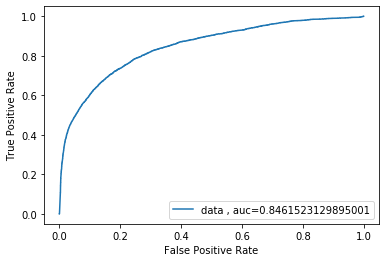

In [209]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc
plt.plot(fpr,tpr,label="data , auc="+str(area_under_curve))
plt.legend(loc=4)
from matplotlib import pyplot
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.show()

### Ques3
#### using the following 3 classifiers:
#### i) Gaussian Naive Bayes (same as above)
#### ii) k-nearest neighbour with k=3 (yes, it can output probabilities)
#### iii) random forest (also outputs probabilities)

In [210]:
from sklearn.datasets import fetch_california_housing
# fetch california housing dataset
cali = fetch_california_housing()
cali.target=np.where(cali.target>=3,1,0)

### 3(A)
#### plot the average ROC curve with error bars over 10 tests sets from 10-fold CV 
### (ie, plot one ROC curve for each fold's test set predictions, and average them all to create a single, smoother ROC curve) error bars should show standard deviation across different folds

In [211]:
X = cali.data
y = cali.target
gnb = GaussianNB()
gnb.fit(cali.data,cali.target)

GaussianNB(priors=None, var_smoothing=1e-09)

In [212]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
import matplotlib.pyplot as plt

In [213]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10)

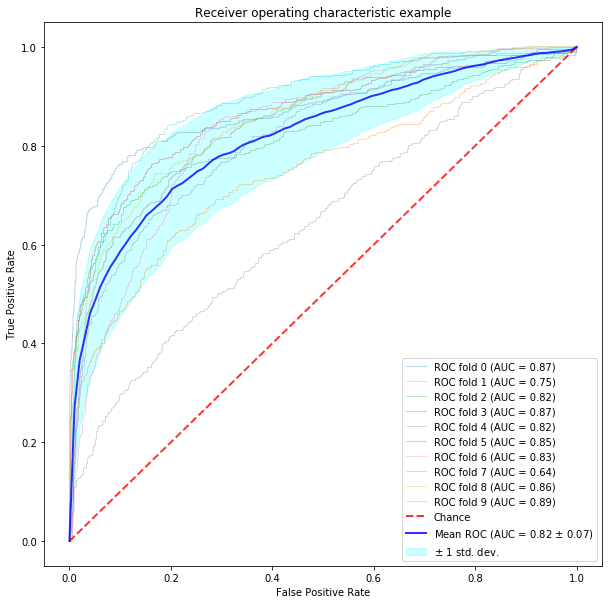

In [215]:
plt.figure(figsize=(10,10))
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = gnb.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='cyan', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [47]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(cali.data,cali.target)
pred_knn=knn.predict(cali.data)
accuracy_score(pred_knn,cali.target)

0.8907461240310077

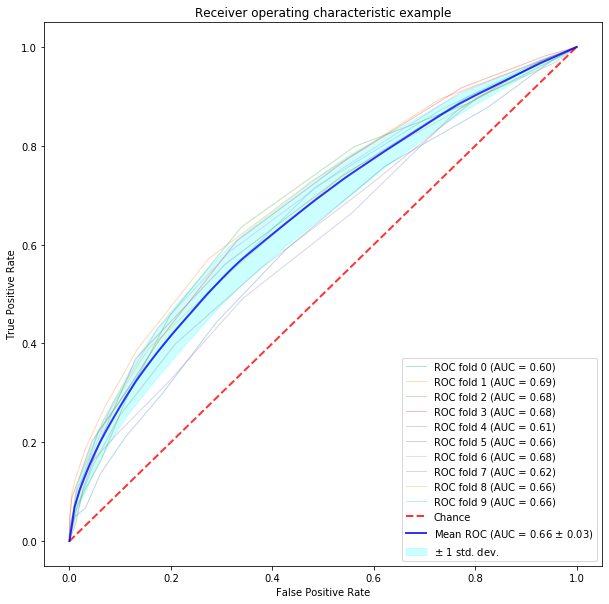

In [216]:
plt.figure(figsize=(10,10))
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = knn.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='cyan', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [217]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(cali.data,cali.target)
pred_rf=rf.predict(cali.data)
accuracy_score(pred_rf,cali.target)

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.993798449612403

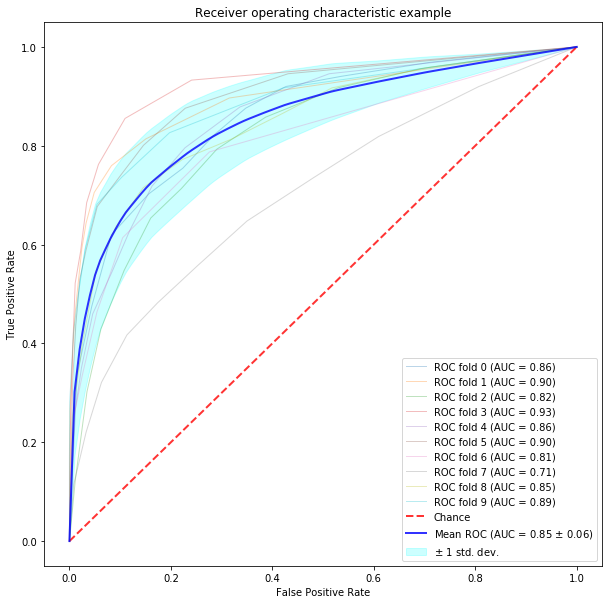

In [218]:
plt.figure(figsize=(10,10))
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = rf.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='cyan', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 3(B)
#### using a t-test, compare the algorithm with the higest performance to the other two algorithms, to output a p-value and state if the p-value is significant (p<0.05)

In [219]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [221]:
from mlxtend.evaluate import paired_ttest_kfold_cv
t, p = paired_ttest_kfold_cv(estimator1=gnb,
                              estimator2=knn,
                              X=X, y=y,cv=10,
                              random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: 2.864
p value: 0.019


In [222]:
t, p = paired_ttest_kfold_cv(estimator1=gnb,
                              estimator2=rf,
                              X=X, y=y,
                              random_seed=1,
                              cv=10)
print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: -2.478
p value: 0.035


In [223]:
t, p = paired_ttest_kfold_cv(estimator1=knn,
                              estimator2=rf,
                              X=X, y=y,
                              random_seed=1,
                              cv=10)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: -3.139
p value: 0.012
